In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_delays_and_profits(paths):
    output = None
    for path in paths:
        master_profit = None
        delays = {}
        for file in os.listdir(path):
            if 'HerdMasterAgent' in file:
                try:
                    df = pd.read_pickle(os.path.join(path,file), compression='bz2')
                    master_profit = df.loc[df.EventType == 'ENDING_CASH', 'Event'].values[0] - df.loc[df.EventType == 'STARTING_CASH', 'Event'].values[0]
                except (IndexError, KeyError):
                    continue                
            if 'HerdSlaveAgent' in file:
                try:
                    df = pd.read_pickle(os.path.join(path,file), compression='bz2')
                    delay = df.loc[df.EventType == 'DELAY', 'Event'].values[0]
                    profit = df.loc[df.EventType == 'ENDING_CASH', 'Event'].values[0] - df.loc[df.EventType == 'STARTING_CASH', 'Event'].values[0]
                    delays[delay] = profit
                except (IndexError, KeyError):
                    continue
        x, y = np.asarray(sorted(delays.items()))[:, 0], np.asarray(sorted(delays.items()))[:, 1]
        temp = pd.DataFrame({'DELAY': x, 'SLAVE_PROFIT': y})
        temp['MASTER_PROFIT'] = master_profit
        temp['SIMULATION'] = path
        if output is None:
            output = temp
        else:
            output = output.append(temp)
    output['PERCENT'] = output.SLAVE_PROFIT/output.MASTER_PROFIT
    output = output.sort_values(by='DELAY').reset_index(drop=True)
    return output

In [13]:
# end-time 12:00:00
# master-window 1e+9
# slave-min-delay 1e+1 
# slave-max-delay 1e+8
# 1 master
# 40 slaves
# limit orders

# Master Strategy
#    if ask < r_f:
#        buy = True
#        p = ask - adjust_int
#        if p >= r_f:
#            return
#    elif bid > r_f:
#        buy = False
#        p = bid + adjust_int
#        size = self.getHoldings(self.symbol) if self.getHoldings(self.symbol) > 0 else self.size
#        if p <= r_f:
#            return


PATHS = ["log/herd01_2_5_hour_0/"]

df = get_delays_and_profits(PATHS)

In [14]:
df.head(10)

,DELAY,SLAVE_PROFIT,MASTER_PROFIT,SIMULATION,PERCENT
0,647346,87555,336637,log/herd01_2_5_hour_0/,0.260087
1,2912948,49012,336637,log/herd01_2_5_hour_0/,0.145593
2,6888632,190277,336637,log/herd01_2_5_hour_0/,0.565229
3,7105184,-7609,336637,log/herd01_2_5_hour_0/,-0.022603
4,20448707,238400,336637,log/herd01_2_5_hour_0/,0.708181
5,27956521,323794,336637,log/herd01_2_5_hour_0/,0.961849
6,28288454,-23620,336637,log/herd01_2_5_hour_0/,-0.070165
7,29093803,-13429,336637,log/herd01_2_5_hour_0/,-0.039892
8,29318341,-103924,336637,log/herd01_2_5_hour_0/,-0.308712
9,32561467,23681,336637,log/herd01_2_5_hour_0/,0.070346


In [15]:
df['g'] = df.index//3
temp = df.groupby('g').agg(['mean', 'std'])

In [16]:
temp

DELAY                 SLAVE_PROFIT                MASTER_PROFIT  \
            mean           std           mean            std          mean   
g                                                                            
0   3.482975e+06  3.159448e+06  108948.000000   73021.882974        336637   
1   1.850347e+07  1.056090e+07  184861.666667  172066.126691        336637   
2   2.890020e+07  5.415520e+05  -46991.000000   49568.023836        336637   
3   3.512713e+07  2.791198e+06    1700.333333   31606.417724        336637   
4   4.369654e+07  4.658611e+06   34954.666667   77633.427107        336637   
5   4.980276e+07  1.417633e+06    6547.666667   17972.969825        336637   
6   5.108456e+07  2.376354e+05   29205.666667   53206.733675        336637   
7   5.417496e+07  2.460007e+06   32895.000000   25722.403445        336637   
8   6.045429e+07  4.094937e+05    2407.333333   18264.265584        336637   
9   6.302714e+07  2.255344e+06   59895.000000   21268.361385        336637   
10  7.798481e+07  1.851847e+06   18834.333333   27565.846574        336637   
11  8.507526e+07  3.712574e+06   -4221.666667    9129.226930        336637   
12  9.324320e+07  4.000162e+06   27230.666667   12825.958886        336637   
13  9.884748e+07           NaN   11855.000000            NaN        336637   

          PERCENT            
    std      mean       std  
g                            
0   0.0  0.323636  0.216916  
1   0.0  0.549142  0.511133  
2   0.0 -0.139590  0.147245  
3   0.0  0.005051  0.093889  
4   0.0  0.103835  0.230615  
5   0.0  0.019450  0.053390  
6   0.0  0.086757  0.158054  
7   0.0  0.097717  0.076410  
8   0.0  0.007151  0.054255  
9   0.0  0.177922  0.063179  
10  0.0  0.055948  0.081886  
11  0.0 -0.012541  0.027119  
12  0.0  0.080890  0.038100  
13  NaN  0.035216       NaN

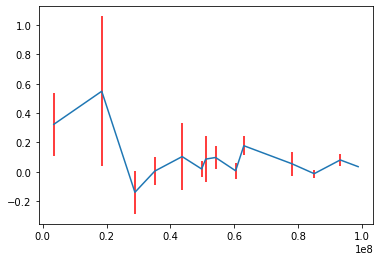

In [17]:
plt.errorbar(temp.DELAY['mean'], temp.PERCENT['mean'], yerr=temp.PERCENT['std'], ecolor='red')  
plt.show()